# Naive Bayes and Text Mining:

In [13]:
import pandas as pd #Importing neccesary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## 1. Data Exploration and Preprocessing

In [14]:
blog = pd.read_csv(r"C:\Users\karen\Downloads\blogs.csv") #Importing Dataset
blog

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [15]:
blog['Labels'].value_counts() #Finding the no of categories

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

In [16]:
print(set(blog['Labels'])) #Finding the unique categories

{'rec.sport.hockey', 'rec.motorcycles', 'misc.forsale', 'rec.autos', 'sci.electronics', 'comp.windows.x', 'sci.med', 'talk.religion.misc', 'talk.politics.guns', 'sci.crypt', 'alt.atheism', 'comp.os.ms-windows.misc', 'comp.sys.mac.hardware', 'talk.politics.misc', 'talk.politics.mideast', 'soc.religion.christian', 'comp.graphics', 'sci.space', 'comp.sys.ibm.pc.hardware', 'rec.sport.baseball'}


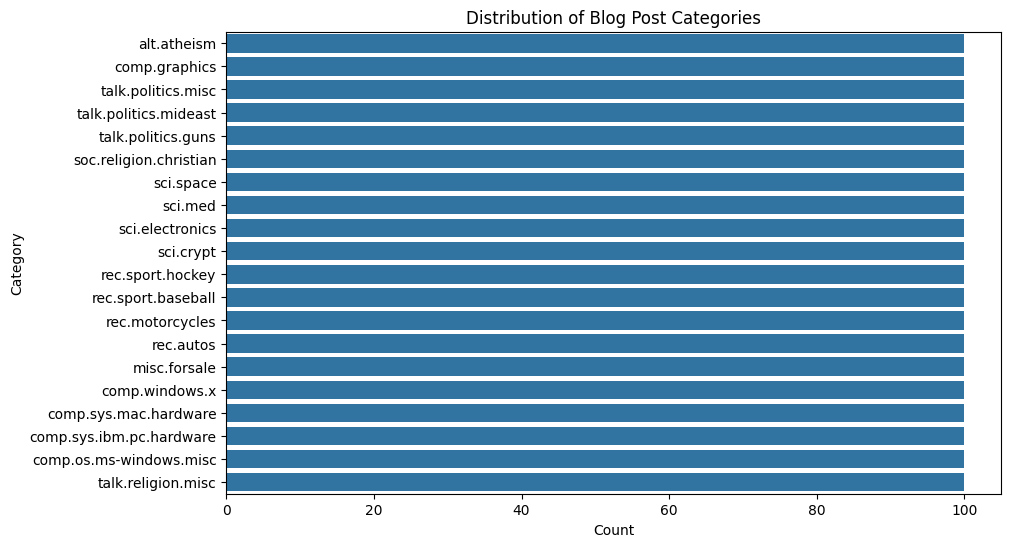

In [17]:
plt.figure(figsize=(10, 6)) #Ploting no of categories to get information visually
sns.countplot(y=blog['Labels'], order=blog['Labels'].value_counts().index)
plt.title('Distribution of Blog Post Categories')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

In [18]:
len(blog['Labels'].value_counts()) #Count the no of unique labels

20

In [19]:
from wordcloud import WordCloud #Importing wordcloud

In [20]:
all_text = ' '.join(blog['Data']) # Combine all the blog texts into one string

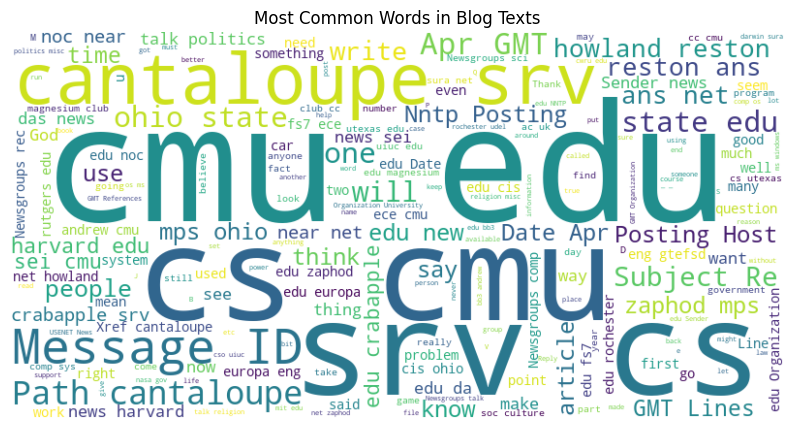

In [21]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text) # Generate the word cloud
plt.figure(figsize=(10, 6)) # Display the word cloud
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()

In [22]:
blog.isna().sum() #Finding the null values in the data

Data      0
Labels    0
dtype: int64

In [23]:
blog.duplicated().sum() #Finding the duplicated rows in the data

0

# **Key Insights**

* The dataset `blog.csv` contains 2 columns. One Data and second is Labels.
* Data column contains  blog posts and Labels columns contains category of blogs.
* In the dataset contains 2000 rows and 20 unique categories.
* All blogs or rows are unique.
* Each category contains 100 differnt blogs.
* There is no duplicated or null rows.
* There is no numerical column in the dataset.

The word cloud reveals key insights:

1. **Educational Focus**: Terms like `cmu` and `edu` are prominent, indicating a focus on academic topics or institutions.
2. **Technical Terms**: Words like `cs` and `srv` suggest discussions related to computer science and servers.
3. **Communication**: Frequent mentions of `Message-ID`, `Path`, and `Posting` imply discussions around email headers and networking.
4. **Specific References**: Terms like `cantaloupe`, `reston`, and `howland` may refer to key topics, individuals, or projects.
5. **Date/Time**: Words like `Apr` and `GMT` suggest time-sensitive content or logs.

In [24]:
print(blog['Data'].iloc[0]) #First blogprint(blog['Data'].iloc[0]) #First blog

Path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!Germany.EU.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!D012S658!frank
From: frank@D012S658.uucp (Frank O'Dwyer)
Newsgroups: alt.atheism
Subject: Re: islamic genocide
Date: 23 Apr 1993 23:51:47 GMT
Organization: Siemens-Nixdorf AG
Lines: 110
Distribution: world
Message-ID: <1r9vej$5k5@horus.ap.mchp.sni.de>
References: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com>
NNTP-Posting-Host: d012s658.ap.mchp.sni.de

In article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:
#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@D012S658.uucp (Frank O'Dwyer) writes:
#|> In article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (Jon Livesey) writes:
#|> #
#|> #Noting that a particular society, in this case the mainland UK,
#|> #has few relig

In [25]:
for i in range(len(blog['Data'])): #Converting all upper case letters to lower case
  word = []
  for j in blog['Data'].iloc[i].split('\n'):
    if j.upper():
      j = j.lower()
      word.append(j)
    else:
      word.append(j)
  blog['Data'].iloc[i] = ' '.join(word)
blog['Data'].iloc[0]

'path: cantaloupe.srv.cs.cmu.edu!magnesium.club.cc.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!howland.reston.ans.net!agate!doc.ic.ac.uk!uknet!mcsun!germany.eu.net!thoth.mchp.sni.de!horus.ap.mchp.sni.de!d012s658!frank from: frank@d012s658.uucp (frank o\'dwyer) newsgroups: alt.atheism subject: re: islamic genocide date: 23 apr 1993 23:51:47 gmt organization: siemens-nixdorf ag lines: 110 distribution: world message-id: <1r9vej$5k5@horus.ap.mchp.sni.de> references: <1r4o8a$6qe@fido.asd.sgi.com> <1r5ubl$bd6@horus.ap.mchp.sni.de> <1r76ek$7uo@fido.asd.sgi.com> nntp-posting-host: d012s658.ap.mchp.sni.de  in article <1r76ek$7uo@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (jon livesey) writes: #in article <1r5ubl$bd6@horus.ap.mchp.sni.de>, frank@d012s658.uucp (frank o\'dwyer) writes: #|> in article <1r4o8a$6qe@fido.asd.sgi.com> livesey@solntze.wpd.sgi.com (jon livesey) writes: #|> # #|> #noting that a particular society, in this case the mainland uk, #|> #has few re

In [26]:
print(blog['Data'].iloc[1]) #Second blog

newsgroups: alt.atheism path: cantaloupe.srv.cs.cmu.edu!crabapple.srv.cs.cmu.edu!bb3.andrew.cmu.edu!news.sei.cmu.edu!cis.ohio-state.edu!zaphod.mps.ohio-state.edu!moe.ksu.ksu.edu!osuunx.ucc.okstate.edu!constellation!darkside!okcforum.osrhe.edu!bil from: bil@okcforum.osrhe.edu (bill conner) subject: re: not the omni! message-id: <c4vznz.jm4@darkside.osrhe.uoknor.edu> sender: news@darkside.osrhe.uoknor.edu nntp-posting-host: okcforum.osrhe.edu organization: okcforum unix users group x-newsreader: tin [version 1.1 pl6] references: <65785@mimsy.umd.edu> date: sat, 3 apr 1993 02:45:35 gmt lines: 18  charley wingate (mangoe@cs.umd.edu) wrote: :  : >> please enlighten me.  how is omnipotence contradictory? :  : >by definition, all that can occur in the universe is governed by the rules : >of nature. thus god cannot break them. anything that god does must be allowed : >in the rules somewhere. therefore, omnipotence cannot exist! it contradicts : >the rules of nature. :  : obviously, an omnipote

In [27]:
import re #Importing regular expressions
import nltk #Natural Language Toolkit
from nltk.corpus import stopwords #Importing stopwords
from nltk.tokenize import word_tokenize #Importing word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer #Importing stemmer and lemmatizer

In [28]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [36]:
# Download NLTK data (stopwords and punkt)
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\karen\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\karen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [37]:
# Define a function to clean and preprocess the text
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply stemming or lemmatization
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply the preprocessing function to the Data column
blog['Data'] = blog['Data'].apply(preprocess_text)
blog.head()

,Data,Labels
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
1,newsgroup altath path cantaloupesrvcscmueducra...,alt.atheism
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism
4,xref cantaloupesrvcscmuedu altath talkreligion...,alt.atheism


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer #Importing TFIDF Vectorizer

In [39]:
TfIdf = TfidfVectorizer() #Initializing TFIDF Vectorizer
TfIdf

TfidfVectorizer()

In [40]:
# Fit and transform the cleaned_text column to TF-IDF features
tfidf_features = TfIdf.fit_transform(blog['Data'])
tfidf_features

<2000x37048 sparse matrix of type '<class 'numpy.float64'>'
	with 236941 stored elements in Compressed Sparse Row format>

In [41]:
# Display the shape of the TF-IDF features matrix
print("Shape of TF-IDF features matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (2000, 37048)


# 2. Naive Bayes Model for Text Classification

In [43]:
from sklearn.model_selection import train_test_split #Importing train_test_split

In [48]:
# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, blog['Labels'], test_size=0.2, random_state=42)


In [49]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 37048)
Shape of X_test: (400, 37048)
Shape of y_train: (1600,)
Shape of y_test: (400,)


In [50]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1600, 37048)
Shape of X_test: (400, 37048)
Shape of y_train: (1600,)
Shape of y_test: (400,)


In [52]:
from sklearn.naive_bayes import MultinomialNB #Importing Naive Bayes
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [53]:
# Initialize the Naive Bayes classifier
nb_clas = MultinomialNB()
nb_clas

MultinomialNB()

In [54]:
# Train the classifier on the training data
nb_clas.fit(X_train, y_train)

MultinomialNB()

In [55]:
# Make predictions on the test data
y_pred = nb_clas.predict(X_test)
y_pred

array(['talk.politics.misc', 'comp.sys.ibm.pc.hardware', 'sci.med',
       'rec.sport.baseball', 'sci.electronics', 'sci.electronics',
       'rec.sport.baseball', 'talk.politics.mideast', 'alt.atheism',
       'sci.med', 'alt.atheism', 'sci.electronics', 'sci.crypt',
       'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware',
       'comp.os.ms-windows.misc', 'rec.autos', 'comp.graphics',
       'talk.politics.guns', 'talk.politics.misc',
       'comp.sys.mac.hardware', 'talk.politics.misc', 'alt.atheism',
       'rec.sport.hockey', 'alt.atheism', 'sci.crypt', 'sci.crypt',
       'rec.sport.baseball', 'rec.autos', 'alt.atheism',
       'rec.sport.baseball', 'rec.sport.baseball', 'comp.windows.x',
       'rec.sport.baseball', 'rec.sport.hockey', 'comp.sys.mac.hardware',
       'sci.med', 'sci.electronics', 'rec.sport.hockey',
       'comp.os.ms-windows.misc', 'sci.electronics',
       'soc.religion.christian', 'comp.os.ms-windows.misc',
       'talk.politics.misc', 'soc.religion.chri

In [56]:
# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.835


In [57]:
# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.55      0.94      0.69        18
           comp.graphics       0.76      0.89      0.82        18
 comp.os.ms-windows.misc       0.87      0.91      0.89        22
comp.sys.ibm.pc.hardware       0.85      0.68      0.76        25
   comp.sys.mac.hardware       0.76      0.90      0.83        21
          comp.windows.x       1.00      0.80      0.89        25
            misc.forsale       1.00      0.61      0.76        18
               rec.autos       0.89      0.89      0.89        18
         rec.motorcycles       0.83      0.94      0.88        16
      rec.sport.baseball       0.86      1.00      0.92        18
        rec.sport.hockey       0.94      1.00      0.97        15
               sci.crypt       0.79      1.00      0.88        19
         sci.electronics       0.68      0.81      0.74        16
                 sci.med       0.94      0.88      0

# **Performance Highlights:**

1. **High Precision and Recall:**
   - Categories like `rec.sport.hockey` (Precision: 0.94, Recall: 1.00, F1-score: 0.97) and `talk.politics.mideast` (Precision: 1.00, Recall: 0.95, F1-score: 0.97) show excellent performance. This indicates that the model is highly effective at both identifying true positives and minimizing false positives in these categories.

   - Other categories such as `comp.graphics`, `rec.sport.baseball`, and `sci.space` also exhibit strong performance across all metrics, indicating the model's robustness in these areas.

2. **Balanced Performance:**
   - Categories like `comp.os.ms-windows.misc`, `rec.autos`, and `soc.religion.christian` have balanced precision, recall, and F1-scores, suggesting that the model performs consistently well in these cases.

#### **Challenges Encountered:**

1. **Poor Performance in `talk.religion.misc`:**
   - The `talk.religion.misc` category shows the most significant performance issue with a low F1-score of 0.33 (Precision: 0.83, Recall: 0.21). The high precision but very low recall suggests that while the model is accurate when it does predict this category, it fails to identify many instances, leading to a high number of false negatives.
   
   - This could be due to the category's overlapping features with other categories, making it difficult for the model to distinguish `talk.religion.misc` posts correctly.

2. **Lower Recall in Some Categories:**
   - Categories like `misc.forsale` (Recall: 0.61) and `comp.sys.ibm.pc.hardware` (Recall: 0.68) have lower recall scores, indicating the model is missing a significant portion of true positive cases. This might be due to less distinctive features or variability within the data, making it challenging for the model to correctly identify all relevant instances.

3. **Overfitting Concerns:**
   - The perfect precision and high F1-scores in some categories, such as `comp.windows.x` (Precision: 1.00) and `talk.politics.mideast` (Precision: 1.00), raise concerns about potential overfitting. While high scores are desirable, perfect scores might indicate that the model has learned to recognize these categories too specifically, possibly at the expense of generalizability.

4. **Class Imbalance:**
   - The `weighted avg` metrics show a slightly lower overall performance compared to the `macro avg`, which may indicate the presence of class imbalance. The model's performance may be skewed by categories with more data (`support`), leading to a higher weighted average but not necessarily reflecting equal performance across all categories.

## 3. Sentiment Analysis

In [58]:
nltk.download('vader_lexicon') #Downloading vader lexicon

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\karen\AppData\Roaming\nltk_data...


True

In [59]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer #Importing sentiment analyzer
sa = SentimentIntensityAnalyzer() #Initializing sentiment analyzer
sa

In [60]:
sentiments = []  # Initialize a list to store sentiment labels
for post in blog['Data']:  # Iterate through the blog posts
    sentiment_score = sa.polarity_scores(post)  # Get sentiment scores for the post
    if sentiment_score['compound'] >= 0.05:  # Determine sentiment label based on scores
        sentiment = 'positive'
    elif sentiment_score['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    sentiments.append(sentiment)

blog['Sentiment'] = sentiments  # Add sentiment labels to the DataFrame
blog.head()

,Data,Labels,Sentiment
0,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,negative
1,newsgroup altath path cantaloupesrvcscmueducra...,alt.atheism,positive
2,path cantaloupesrvcscmuedudasnewsharvardedunoc...,alt.atheism,negative
3,path cantaloupesrvcscmuedumagnesiumclubcccmued...,alt.atheism,negative
4,xref cantaloupesrvcscmuedu altath talkreligion...,alt.atheism,positive


## 4. Evaluation

In [61]:
# Evaluate sentiment distribution across different categories
sentiment = blog.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)
print("\nSentiment Distribution Across Categories:")
sentiment


Sentiment Distribution Across Categories:


Sentiment,negative,neutral,positive
Labels,,,
alt.atheism,37,2,61
comp.graphics,15,7,78
comp.os.ms-windows.misc,22,5,73
comp.sys.ibm.pc.hardware,27,1,72
comp.sys.mac.hardware,21,5,74
comp.windows.x,23,7,70
misc.forsale,14,10,76
rec.autos,29,6,65
rec.motorcycles,28,4,68


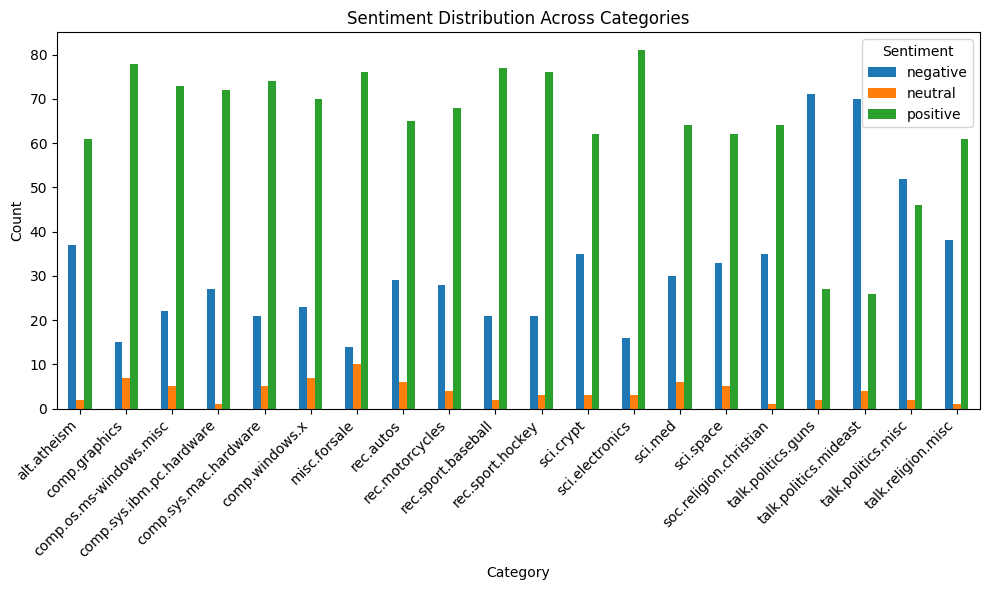

In [62]:
# plot grouped bar chart for sentiment
sentiment.plot(kind='bar', figsize=(10, 6))
plt.title('Sentiment Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

# **Summary of Findings:**

1. **Positive Sentiment**:
   - The majority of categories show a strong positive sentiment. For instance, `comp.graphics` (78 positive), `comp.sys.mac.hardware` (74 positive), and `rec.sport.baseball` (77 positive) all have significantly higher positive sentiment counts compared to negative or neutral sentiments.
   - **Sci.electronics** has the highest positive sentiment count at 81, indicating strong positive discussions in this category.

2. **Negative Sentiment**:
   - The `talk.politics.guns` and `talk.politics.mideast` categories have the highest number of negative sentiments (71 each), and relatively low positive sentiment (27 and 25, respectively). This suggests that discussions in these groups are more likely to be negative.
   - `talk.religion.misc` also has a notable negative sentiment count (38), although it's less pronounced than the political categories.

3. **Balanced Sentiments**:
   - Categories like `alt.atheism` (37 negative, 61 positive) and `soc.religion.christian` (35 negative, 64 positive) have a more balanced distribution between negative and positive sentiments, indicating a mix of opinions.

4. **Low Neutral Sentiment**:
   - Across all categories, neutral sentiment counts are generally low, suggesting that discussions tend to be more polarized towards either positive or negative sentiments.